In [3]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome(r'C:\Users\whddn\OneDrive\문서\chromedriver_win32\chromedriver.exe')

C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\513423115.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\whddn\OneDrive\문서\chromedriver_win32\chromedriver.exe')


In [87]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [89]:
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME,'_aagu')
    first.click()
    time.sleep(3)
select_first(driver)

In [ ]:
# # 크롬 드라이버를 로드합니다.
# driver = webdriver.Chrome(r'C:\Users\whddn\OneDrive\문서\chromedriver_win32\chromedriver.exe')

# # 로그인 페이지로 이동합니다.
# driver.get('https://www.instagram.com/accounts/login/')
# time.sleep(2)

# # 사용자 이름과 비밀번호를 입력합니다.
# username = driver.find_element(By.NAME, 'username')
# password = driver.find_element(By.NAME, 'password')
# username.send_keys('아이디 입력')
# password.send_keys('비밀번호 입력')

# # 로그인 버튼을 클릭합니다.
# login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
# login_button.click()
# time.sleep(5)

# word = "제주도맛집"
# url = insta_searching(word)
# driver.get(url)

# def select_first(driver):
#     first = driver.find_element(By.CLASS_NAME, '_aagu')
#     first.click()
#     time.sleep(3)

# select_first(driver)

In [13]:
import re
from bs4 import BeautifulSoup
!pip install lxml

In [90]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    #     본문내용
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    # 태그
    tags = re.findall(r'#[^\s\<]+', content)
    # 날짜정보
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    # 좋아요 수
    try:
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    # 장소정보
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '2023-04-03',
 0,
 '',
 ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']]

In [91]:
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME,'_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

In [92]:
word = "제주데이트"
url = insta_searching(word)

In [93]:
driver.get(url)
time.sleep(3)

In [94]:
select_first(driver)

In [96]:
results = []
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
print(results[:2])

In [19]:
import pandas as pd

In [97]:
results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./files/crawling_jejuDate.xlsx', index=False)

In [21]:
jeju_insta_df = pd.DataFrame([])
folder = './files/'
f_list = ['crawling_jejuMatJip.xlsx','crawling_jejuMatJip2.xlsx','crawling_jejuMatJip3.xlsx','crawling_jejuCafe.xlsx','crawling_jejuDate.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns = ['content','date','like','place','tags']
jeju_insta_df.drop_duplicates(subset=["content"], inplace=True)
jeju_insta_df.to_excel('./files/crawling_jeju.xlsx', index=False)

C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\4086908443.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df= jeju_insta_df.append(temp)
C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\4086908443.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df= jeju_insta_df.append(temp)
C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\4086908443.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df= jeju_insta_df.append(temp)
C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\4086908443.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df= jeju_insta_df.append(temp)
C:\Users\whddn\AppData\L

In [22]:
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
jeju_insta_df.to_excel('./files/crawling_raw.xlsx', index = False)

In [23]:
raw_total = pd.read_excel('./files/crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1    ['#제주공항근처맛집', '#제주공항근처맛집', '#제주맛집', '#제주시맛집', ...
2    ['#반영구입술#아마존베스트셀러#출근', '#초등부#초코크로와상#대바늘#어젯밤🎗#애...
Name: tags, dtype: object

In [24]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [25]:
tags_total[:5]

['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '#제주공항근처맛집',
 '#제주공항근처맛집',
 '#제주맛집',
 '#제주시맛집']

In [26]:
from collections import Counter

In [27]:
tag_counts = Counter(tags_total)

In [28]:
tag_counts.most_common(100)

[('', 65),
 ('#제주맛집', 53),
 ('#제주여행', 50),
 ('#제주도맛집', 37),
 ('#제주데이트', 37),
 ('#제주카페', 31),
 ('#제주가볼만한곳', 24),
 ('#제주도', 23),
 ('#서귀포맛집', 20),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주공항근처맛집', 16),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주도카페', 16),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주도데이트', 11),
 ('#제주핫플레이스', 11),
 ('#제주공항맛집', 10),
 ('#중문맛집', 9),
 ('#애월카페', 9),
 ('#맞팔', 8),
 ('#제주도맛집추천', 8),
 ('#제주숙소', 8),
 ('#제주도가볼만한곳', 7),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#제주도핫플', 6),
 ('#먹방', 6),
 ('#먹팔', 6),
 ('#제주살이', 6),
 ('#일상', 6),
 ('#제주신상카페', 6),
 ('#여행', 6),
 ('#좋아요', 6),
 ('#제주여행추천', 6),
 ('#제주펜션', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#데일리', 5),
 ('#제주공항', 5),
 ('#jeju', 5),
 ('#한림카페', 5),
 ('#팔로우', 5),
 ('#좋반', 5),
 ('#서귀포카페추천', 5),
 ('#제주포토존', 5),
 ('#함덕맛집', 4),
 ('#먹스타', 4),
 ('

In [98]:
STOPWORDS = ['', '#일상','#맞팔','#먹팔맞팔','#울산맛집','#ootd','#fff', '#먹스타','#먹스타맞팔','#좋반','#소통','#제주포토존','#먹방','#먹팔','#좋아요','#제주펜션','#데일리','#제주숙소','#팔로우']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 53),
 ('#제주여행', 50),
 ('#제주도맛집', 37),
 ('#제주데이트', 37),
 ('#제주카페', 31),
 ('#제주가볼만한곳', 24),
 ('#제주도', 23),
 ('#서귀포맛집', 20),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주공항근처맛집', 16),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주도카페', 16),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주도데이트', 11),
 ('#제주핫플레이스', 11),
 ('#제주공항맛집', 10),
 ('#중문맛집', 9),
 ('#애월카페', 9),
 ('#제주도맛집추천', 8),
 ('#제주도가볼만한곳', 7),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#제주도핫플', 6),
 ('#제주살이', 6),
 ('#제주신상카페', 6),
 ('#여행', 6),
 ('#제주여행추천', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#제주공항', 5),
 ('#jeju', 5),
 ('#한림카페', 5),
 ('#서귀포카페추천', 5),
 ('#함덕맛집', 4),
 ('#한림맛집', 4)]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [100]:
# 빈도수 기준 상위 30개의 데이터를 pandas 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

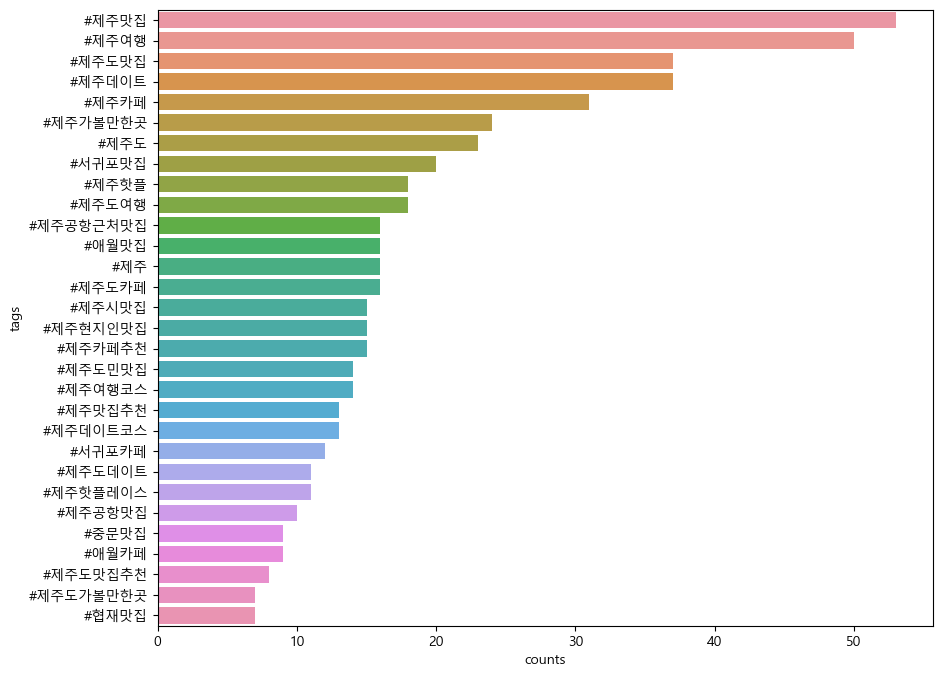

In [101]:
# 막대 차트 그리기
plt.figure(figsize=(10,8)) # 차트 이미지 크기 조정
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [33]:
!pip install wordcloud
from wordcloud import WordCloud
import platform

In [34]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

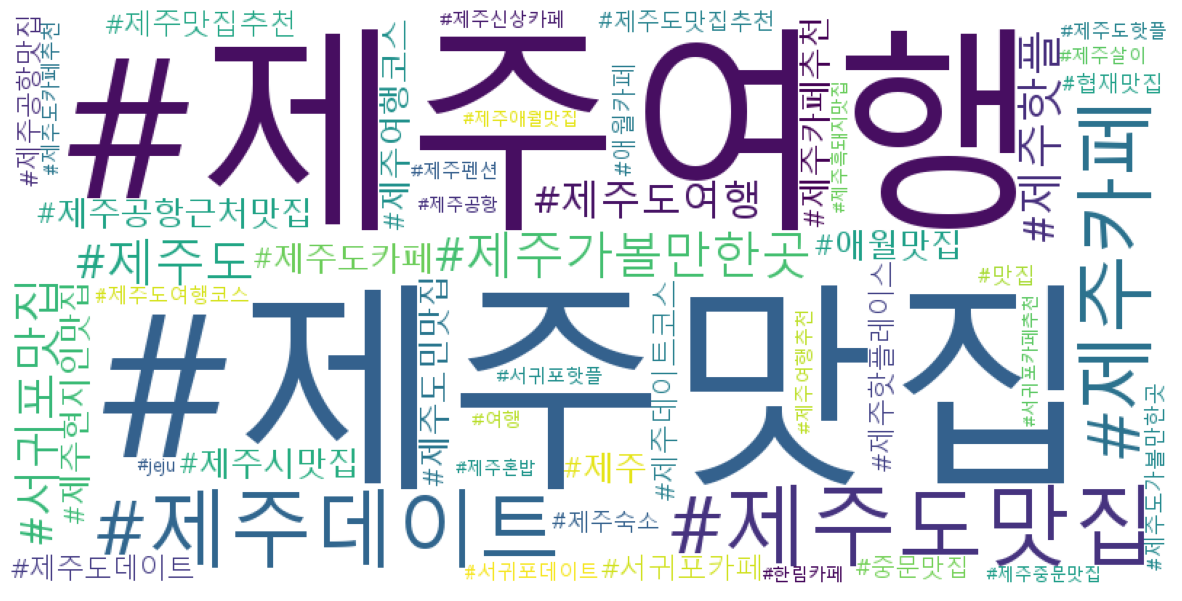

In [35]:
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/tag-wordcloud.png')

In [102]:
raw_total = pd.read_excel('./files/crawling_raw.xlsx')
raw_total.head()

,content,Data,like,place,tags
0,"광고) 진심으로 추천해주고 싶은활어회맛집 ""노형수산시장""서울의 노량진수산시장이 있다...",2023-04-03,0,NaN,['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1,제주도 대표! 보말칼국수 보증맛집 남순이네!*남순이네국수제주에서 맛집 찾으시는분들은...,2023-04-04,0,NaN,"['#제주공항근처맛집', '#제주공항근처맛집', '#제주맛집', '#제주시맛집', ..."
2,남편이랑 쇼핑하면서 인증샷 ^^ 제가 사준선물#반영구입술#아마존베스트셀러#출근 #초...,2023-04-04,0,NaN,"['#반영구입술#아마존베스트셀러#출근', '#초등부#초코크로와상#대바늘#어젯밤🎗#애..."
3,(광고)제주돈아_고내점바다 보면서 흑돼지먹을수 있다공!!!!!!이게 제주도 감성이지...,2023-04-04,0,NaN,"['#애월맛집', '#애월흑돼지', '#애월해안도로맛집', '#애월흑돼지맛집', '..."
4,[ 기쁨이네해물탕앤돌솥밥 ]전날 술을 많이 먹어서 해장하러 방문한 해물탕집!둘이 먹...,2023-04-04,7,함덕해수욕장,"['#제주', '#제주도', '#함덕해수욕장', '#제주맛집', '#제주도맛집', ..."


In [103]:
location_counts = raw_total['place'].value_counts( )
location_counts

제주도 제주              20
제주도                  7
퍼플모스 Purple Moss     3
Jeju-do              3
루페이퍼 Rupaper         2
                    ..
애월                   1
제주에인감귤밭              1
니모메빈티지라운지            1
초록달과자점               1
삼성혈                  1
Name: place, Length: 75, dtype: int64

In [104]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,20
제주도,7
퍼플모스 Purple Moss,3
Jeju-do,3
루페이퍼 Rupaper,2


In [105]:
location_counts_df.to_excel('./files/location_counts.xlsx')

In [106]:
locations = list(location_counts.index)
locations

['제주도 제주',
 '제주도',
 '퍼플모스 Purple Moss',
 'Jeju-do',
 '루페이퍼 Rupaper',
 '환상의 섬 Jeju Island',
 '제주도 제주시',
 '제주도 서귀포',
 '제주도 Jeju Island',
 '노턴',
 '여누카페',
 '보롬왓',
 'Baalamb In Jeju',
 '제주참숯가마',
 '애월읍 장전리',
 '위즈커피',
 '골목커피',
 '비밀의숲',
 '카페코지 Cafe Coji',
 '불광천',
 '레이오버 제주',
 'One and only - 원앤온리 제주',
 '바닐라파레트',
 '조천읍 와흘리',
 '함덕해수욕장',
 '대흘리',
 '카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol',
 '제주신라면세점',
 '너럭',
 '제주도 중문',
 '제주 구좌읍 세화리',
 'Amber Purehill Hotels&Resorts',
 '오지하우스:호주식당',
 '제주도 제주시 노형동',
 '건강과 성 박물관',
 '제주도애월해안로',
 '손방둥이 공방',
 '오션갤러리 호텔앤리조트',
 '제주 함덕 서우봉 해변',
 '브라보비치',
 '카페도도다',
 'Sinchang Windmill Coastal Road',
 '카페 마노르블랑 제주',
 '경주',
 '이월드 (E-WORLD)',
 '맛집탐방',
 '성읍탐라식당',
 'Jeju Island,Korea',
 '제주신화월드',
 'Naive Silhouette - 나이브실루엣',
 '금능해수욕장',
 '묵전 제주',
 '동백포레스트',
 '닭머르',
 '별방진',
 '제주도 한경면',
 '석 인 장 碩 仁 張',
 '제주여행',
 'Palgil',
 '제주시 조천읍 와산리',
 '제주도제주시 삼화지구',
 '숙성도',
 '제주도 애월읍',
 '이층빵집 굽는아방',
 '사이카레',
 '서귀포 쌍둥이 횟집',
 '옹포리',
 '키친요디2호관',
 '동문시장 Dongmoon Market 東門水産市場',
 'wiee.jeju',
 '애월',

In [107]:
import requests

In [108]:
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {'Authorization':'KakaoAK 52b0e035cc6d553cf0df8d8cc04ec801'}

places = requests.get(url, headers = headers).json()['documents']
places


[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [111]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {'Authorization':'KakaoAK 52b0e035cc6d553cf0df8d8cc04ec801'}

    places = requests.get(url, headers = headers).json()['documents']
    places = places[0]
    
    name = places['place_name']
    x = places['x']
    y = places['y']
    data = [name, x, y, searching]
    return data

In [112]:
!pip install tqdm
from tqdm import tqdm_notebook

In [113]:
from tqdm import tqdm_notebook

import time
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except: oh
        pass
locations_inform

IndentationError: unexpected indent (206121540.py, line 11)

In [114]:
import time
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

C:\Users\whddn\AppData\Local\Temp\ipykernel_20340\60451310.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/75 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '제주도 제주시'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51530966206293', '33.23738579332568', '제주도 서귀포'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['노턴', '127.48756687650614', '36.63793879189138', '노턴'],
 ['여누카페', '126.673670981413', '33.4322161409169', '여누카페'],
 ['보롬왓', '126.75249576943', '33.4134970849722', '보롬왓'],
 ['제주참숯가마찜질방', '126.86341600718973', '33.369142317425506', '제주참숯가마'],
 ['왕벚꽃거리', '126.383825919428', '33.4521219667359', '애월읍 장전리'],
 ['위즈커피', '126.432128534267', '33.4874749915111', '위즈커피'],
 ['골목커피', '126.373756993927', '34.8035129331836', '골목커피'],
 ['비밀의숲', '126.75493209633262', '33.45360917744684', '비밀의숲'],
 ['불광천', '126.906234509821', '37.5800209041095', '불광천'],
 ['레이오버', '126.812358181761', '33.5586485959582', '레이오버 제주'],
 ['원앤온리', '126.319192490757', 

In [115]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도','위도','인스타위치명']
locations_inform_df.to_excel('./files/locations.xlsx', index=False)

In [116]:
location_counts_df = pd.read_excel('./files/location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./files/locations.xlsx')

In [117]:
location_inform_df

,name_official,경도,위도,인스타위치명
0,제주도,126.545874,33.379778,제주도 제주
1,제주도,126.545874,33.379778,제주도
2,올레길 18코스(제주원도심-조천 올레),126.582143,33.525228,제주도 제주시
3,올레길 7코스(서귀포-월평 올레),126.515310,33.237386,제주도 서귀포
4,제주도,126.545874,33.379778,제주도 Jeju Island
...,...,...,...,...
56,올레길 16코스(고내-광령 올레),126.389796,33.466498,애월
57,제주에인감귤밭,126.539014,33.256561,제주에인감귤밭
58,니모메,126.430921,33.493701,니모메빈티지라운지
59,초록달과자점,126.330382,33.435914,초록달과자점


In [118]:
location_counts_df

,place
제주도 제주,20
제주도,7
퍼플모스 Purple Moss,3
Jeju-do,3
루페이퍼 Rupaper,2
...,...
애월,1
제주에인감귤밭,1
니모메빈티지라운지,1
초록달과자점,1


In [119]:
location_data = pd.merge(locations_inform_df, location_counts_df,how='inner', left_on='name_official', right_index=True)
location_data.head()
# location_data = location_data.reset_index()

,name_official,경도,위도,인스타위치명,place
0,제주도,126.54587355630036,33.379777816446165,제주도 제주,7
1,제주도,126.54587355630036,33.379777816446165,제주도,7
4,제주도,126.54587355630036,33.379777816446165,제주도 Jeju Island,7
5,노턴,127.48756687650614,36.63793879189138,노턴,2
6,여누카페,126.673670981413,33.4322161409169,여누카페,1


In [122]:
location_data = location_data.pivot_table(index=['name_official','경도','위도'], values='place', aggfunc='sum')
location_data.head(20)

,,,place
name_official,경도,위도,
골목커피,126.373756993927,34.8035129331836,1
금능해수욕장,126.235889902253,33.3904488156321,1
너럭,126.508813679489,33.5161973720611,1
노턴,127.48756687650614,36.63793879189138,2
닭머르,126.61189693619232,33.53647489410832,1
동백포레스트,126.63619814081831,33.300308154725585,1
바닐라파레트,126.480579828486,33.4771172717429,1
별방진,126.882898730735,33.5267719838211,1
보롬왓,126.75249576943,33.4134970849722,1


In [123]:
location_data = location_data.reset_index()

In [124]:
location_data.to_excel('./files/location_inform.xlsx')

In [125]:
import folium

In [126]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start=11)

In [129]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat),radius=size, color='red', popup=name).add_to(map_jeju)

map_jeju

In [131]:
map_jeju.save('./files/jeju.html')

In [132]:
from folium.plugins import MarkerCluster

In [134]:
locations = []
names = []
for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
    
icon_create_function = """\
function(cluster) {
return L.divIcon({
html: '<b>' + cluster.getChildCount() + '</b>',
className: 'marker-cluster marker-cluster-large',
iconSize: new L.Point(30, 30)
});
}
"""

In [135]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start=11)

In [137]:
marker_cluster = MarkerCluster(
    locations = locations, 
    popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [138]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [ ]:
map_jeju2.save('./files/jeju_cluster.html')